> ## **Métodos Computacionales II - Taller #3**

**Hecho por:** Thomas Andrade Hernández (202214695) & Juan Carlos Rojas V. (202214037)

---

In [30]:
# Zona de librerías:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import random as rnd
import math as math
import scipy as sci

>**Sección 2.9.3**

---

**1.** Sea el sistema autónomo definido por:

$$\dot{q} = f(q, p)$$

$$\dot{p} = g(q, p)$$

Los puntos del espacio de fase donde el flujo es estacionario se denominan puntos fijos tal que: $f(q_{0}, p_{0}) = 0$. Muestre que la estabilidad de los estados mecánicos definidos por esos puntos conduce a la siguiente ecuación matricial:

$$\frac{d\mathbf{E}}{dt} = \mathbf{ME},$$

donde $\mathbf{M}$ se denomina matriz de estabilidad:

$$\begin{pmatrix}
\dfrac{\partial f(q_{0}, p_{0})}{\partial q} & \dfrac{\partial f(q_{0}, p_{0})}{\partial p} \\
\dfrac{\partial g(q_{0}, p_{0})}{\partial q} & \dfrac{\partial g(q_{0}, p_{0})}{\partial p}
\end{pmatrix}$$

Los auto-vectores constituyen una base local del espacio de fases. Note que si los valores propios son imaginarios puros, la perturbación permanece acotada oscilando alrededor de los puntos fijos. De lo contrario, si los valores propios son reales, las soluciones crecerán o decrecerán con el tiempo.

---

**(a).** Solucione numéricamente el sistema de ecuaciones.

---

**(b).** Encuentre la matriz de estabilidad del sistema autónomo lineal:

$$x' = 2x - y$$

$$y' = x + 2y$$

---

**(c).** Encuentre numéricamente los valores y vectores propios.

---

**(d).** Dibuje la trayectoria sobre el espacio de fase. ¿Cuál es el punto crítico?

---

**3. Symmetric spinning top:** [Contexto entero en las notas de la clase.]

---

**(a).** Muestre con todo detalle que:

$$I_{0} = \frac{1}{4}mr^{2} + md^{2}.$$


![Diagrama del objeto](https://github.com/jcrojasv1/MetodosII_ThomasAndrade_JuanRojas/blob/main/3.%20Tercer%20Taller/imag/diagram.png?raw=true)


Defínase $\alpha = \frac{\pi}{2} - \theta$. Entonces, la distancia de un $\text{d}m$ al eje de rotación está dado por $r\sin\alpha$. Por otro lado, usando la proyección del disco sobre el plano $xy$, se puede ver que esta es una elipse con forma $$\frac{x^2}{r^2\sin \alpha^2} + \frac{y^2}{r^2} = 1$$ El sistema, sería entonces equivalente a una elipse plana. Como se muestra.

![Elipse equivalente al sistema con respecto al eje de rotación puntedo.](https://github.com/jcrojasv1/MetodosII_ThomasAndrade_JuanRojas/blob/main/3.%20Tercer%20Taller/imag/elipse.png?raw=true)

---

**(b).** Calcule el momento de incercia del disco:

$$I_{z} = \frac{1}{2}mr^{2}$$

El momento de inercia con respecto a $z$, en el caso del diagrama $z'$, se puede calcular el momento de inercia de esta forma: \\

Tomando que $m = \rho A = \rho (\pi r^2) \implies \text{d} m = 2 \pi r \rho \text{d} r$ . Se tiene que 
\begin{align}
I_z &= \int_{0}^{r} r'^2 \text{d} m \\
&= \int_{0}^{r} 2 \pi r' \rho r'^2 \text{d}r \\
&= 2\pi \rho\int_{0}^{r} r'^3 \text{d}r \\
&= 2 \pi \rho \frac{r^4}{4} =  \rho \pi r^2 \frac{r^2}{2} = \frac{1}{2}mr^2.
\end{align}

---

**(c).** Usando las ecuaciones de Euler-Lagrange muestre que las ecuaciones de movimiento están dadas por:

$$\frac{\partial \mathcal{L}}{\partial \dot{\phi}} = \dot{\phi} \cdot \left(I_{0}\sin^{2}\theta + I_{z}\cos^{2}\theta\right) + I_{z}\dot{\psi}\cos\theta = p_{\phi}$$

$$\frac{\partial \mathcal{L}}{\partial \dot{\psi}} = I_{z}\left(\dot{\psi} + \dot{\phi}\cos\theta\right) = p_{\psi}$$

$$I_{0}\ddot{\theta} = \dot{\phi}^{2}\sin\theta\cos\theta(I_{0} - I_{z}) - \dot{\phi}\dot{\psi}I_{z}\sin\theta + mgd\sin\theta.$$

donde $p_{\phi}$ y $p_{\psi}$ son los momentos canónicos conjugados de las variables $\phi$ y $\psi$ (note que además se conservan).



---

**(e).** Usando los integradores de $\verb|Scipy|$, integre el sistema de ecuaciones diferenciales con el siguiente orden:

$\mathbf{y} = \left[\phi, \psi, \theta, \dot{\theta}\right]$ con la condición inicial: $\mathbf{y_{0}} = \left[0, 0, \pi/4, 0\right]$. El intervalo de integración es $t \in \left[0, 8\right]$ s. Use los siguientes parámetros del sistema: $m = 0.1$ kg, $r = 0.1$ m, $d = 0.3$ m, $g = 9.81$ m$/$s$^{2}$, $\dot{\psi} = 400$ rad$/$s. Adicionalmente, para integrar la ecuación debe encontrar los momentos canónicos: $p_{\phi} = I_{z}\dot{\psi}\cos\theta_{0}$, $p_{\psi} = I_{z}\dot{\psi}$.

In [31]:
m = 0.1 
r = 0.1
d = 0.3
g = 9.81
psi_dot_0 = 400
theta_0 = np.pi/4
t = np.linspace(0,8,1000)


I_0 = (1/4)*m*r**2 + m*d**2
I_z = 0.5*m*r**2

p_phi = I_z*psi_dot_0*np.cos(theta_0)


def phi_dot(theta):
    return (p_phi - I_z*psi_dot_0*np.cos(theta))/(I_0*np.sin(theta)**2+I_z*np.cos(theta)**2)



def System(y,t):
    phi,psi,theta,theta_dot = y
    
    dpsidt = psi_dot_0
    dphidt = phi_dot(theta)
    dtheta = theta_dot
    ddthetaddt = (dphidt**2 *np.sin(theta)*np.cos(theta)*(I_0 - I_z) - dphidt*dpsidt*I_z*np.sin(theta)+m*g*d*np.sin(theta))/I_0
    
    return [dphidt,dphidt,dtheta,ddthetaddt]

y_0 = (0.,0.,np.pi/4,0)

y = sci.integrate.odeint(System,y_0,t)

phi_ = y[:,0]
psi_ = y[:,1]
theta_ = y[:,2]

x = d*np.sin(theta_)*np.sin(phi_)
y= d*np.sin(theta_)*np.cos(phi_)
z = d*np.cos(theta_)



---

**(f).** Anime la solución para mostrar el proceso de precesión y nutación en este sistema.


<IPython.core.display.Javascript object>


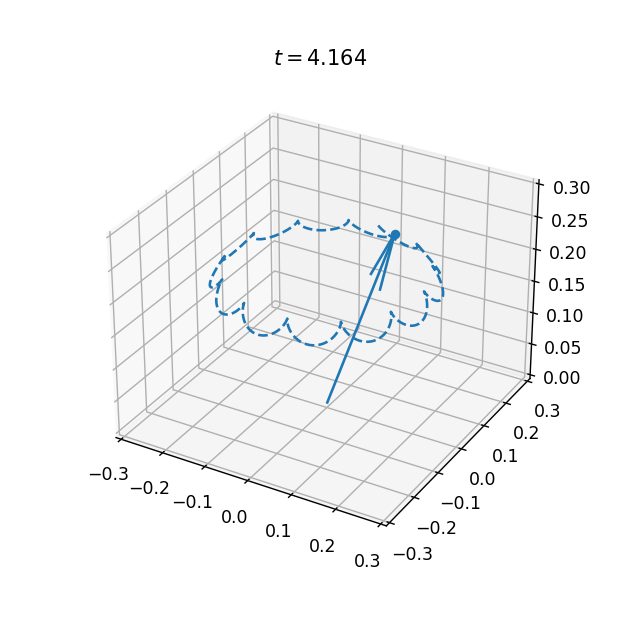

In [32]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111,projection="3d")


def init_():
    
    ax.clear()
    ax.set_zlim(0,0.3)
    ax.set_ylim(-0.3,0.3)
    ax.set_xlim(-0.3,0.3)
    
    
def Update_(i):
    
    init_()
    
    ax.quiver(0,0,0,x[10*i],y[10*i],z[10*i])
    ax.plot(x[:10*i],y[:10*i],z[:10*i],"--")
    ax.scatter(x[10*i],y[10*i],z[10*i])
    ax.set_title(r"$t = %s$"%(round(t[10*i],3)))
        

        
    
Animation = anim.FuncAnimation(fig,Update_,frames=len(t[::10]),init_func=init_)


---
**(g).** ¿Cuál es la velocidad de precesión del sistema?

---

**3. Symmetric spinning top:** La NASA requiere dos estudiantes del curso de métodoscomputacionales para realizar una pasantía en el departamento de objetos cercanos a la Tierra. Para elegir a los estudiantes se solicita una simulación sencilla del problema de tres cuerpos de una nave que pueda fotografiar el lado oculto de la Luna. Yo sugerí a mis estudiantes del curso de Métodos Computacionales II de la Universidad de los Andes como posibles candidatos; en quienes puedo depositar mi confianza.

Para presentar sus propuestas sugiero la siguiente estrategia:

**(a).** Vamos a suponer la Tierra inmóvil y la Luna siguiendo una órbita circular cuya frecuencia angular es $\omega = 2.6617 \times 10^{−6}\text{s}^{−1}$. Esto evita integrar la ecuación de la Luna, la cual es en realidad elíptica.

**(b).** La simulación será realizada en el S.I. de unidades que resulta más conveniente en el caso del sistema Tierra-Luna. El paso de integración deben ser segundos de vuelo $(h ∼ s)$, pero se debe graficar cada $1000$ pasos usando animation dado que el viaje a la Luna dura días terrestres.

$$G = 6.67 \times 10^{-11} \ \text{Nm}^{2}\text{kg}^{-2}$$

$$m_{T} = 5.9736 \times 10^{24} \ \text{kg}$$

$$r_{T} = 6.3781 \times 10^{6} \text{m}$$

$$m_{L} = 0.07349 \times 10^{24} \ \text{kg}$$

$$r_{L} = 1.7374 \times 10^{6} \text{m}$$

$$d = 3.844 \times 10^{8} \text{m}$$

---

**(c).** Muestre, usando la imágen en las notas, que la distancia Nave-Luna está dada por:

$$r_{L}(r, \phi, t) = \sqrt{r(t)^{2} + d^{2} - 2r(t) \cdot \cos(\phi - \omega{t})}$$

---

**(d).** Usando esta distancia muestre que el Hamiltoniano de la nave está dado por:

$$H = p_{r}\dot{r} + p_{\phi}\phi - L = \frac{p_{r}^{2}}{2m} + \frac{p_{\phi}^{2}}{2mr^{2}} - G\frac{mm_{T}}{r} - G\frac{mm_{L}}{r_{L}(r, \phi, t)}$$

donde L (el lagrangiano del sistema) es la energía cinética menos la energía potencial de la nave en coordenadas polares.

**(e).** Muestre que las ecuaciones de Hamilton, que son las ecuaciones de movimiento están
dadas por:

$$\dot{r} = \frac{\partial H}{\partial p_{r}} = \frac{p_{r}}{m}$$

$$\dot{\phi} = \frac{\partial H}{\partial p_{\phi}} = \frac{p_{\phi}}{mr^{2}}$$

$$\dot{p}_{r} = \frac{\partial H}{\partial r} = \frac{p_{\phi}^{2}}{mr^{3}} - G\frac{mm_{L}}{r^{2}} -G\frac{mm_{L}}{r_{L}(r, \phi, t)^{3}} \cdot \left[r - d\cos(\phi - \omega t)\right]$$

$$\dot{p}_{\phi} = \frac{\partial H}{\partial \phi} = -G\frac{mm_{L}}{r_{L}(r, \phi, t)^{3}} \cdot rd \sin(\phi - \omega t)$$

Note que las dos primeras ecuaciones se refiere al momento lineal y angular de la nave y las segundas a la fuerza. Adicionalmente, este sistema de ecuaciones diferenciales no tiene solución analítica al ser no lineales. Este tipo de sistemas son de gran estudio numérico para establecer órbitas más reales.

---

**(f)**. Para reducir el error de redondeo se pueden definir nuevas variables normalizadas a la distancia lunar: $\tilde{r} = r/d$, $\phi$, $\tilde{p}_{r} = p_{r}/md$ y $\tilde{p}_\phi = p_{\phi}/md^{2}$. Muestre que el sistema se puede escribir como sigue:

$$\dot{\tilde{r}} = \dot{\tilde{p}}_{r}$$

$$\dot{\phi} = \frac{\dot{\tilde{p}}_{\phi}}{\tilde{r}^{2}}$$

$$\dot{\tilde{p}}_{r} = \frac{\dot{\tilde{p}}_{\phi}^{2}}{r^{3}} - \Delta \left[\frac{1}{\tilde{r}^{2}} + \frac{\mu}{\tilde{r}'^{3}}\left[r - d\cos(\phi - \omega t)\right]\right]$$

$$\dot{\tilde{p}}_{\phi} = \frac{\Delta\mu\tilde{r}}{\tilde{r}'^{3}} \cdot \sin(\phi - \omega t)$$

donde $\Delta = Gm_{T}/d^{3}$, $\mu = m_{L}/m_{T}$ y $\tilde{r}' = \sqrt{1 + \tilde{r}^{2} - 2\tilde{r}\cos(\phi - \omega t)}$.

**(g).** Resolver el sistema de ecuaciones usando el algoritmo Runge-Kutta 4 con las siguientes condiciones iniciales: El radio inicial es el radio terrestre $r = r_{T}$ , $\phi$ es la latitud sobre el planeta, la velocidad inicial está dada por: $v = [v\cos(\theta), v\sin(\theta)]$ no hay un método
general para asignar $v$, $\theta$, $\phi$. La magnitud de la velocidad debe ser cercana la velocidad de escape de la Tierra para que la nave se pueda poner rumbo a la Luna. Ustedes deben ajustar los ángulos para lograr fotografiar el lado oculto de la Luna; lanzando su misión cuando la Luna se encuentre en el Perigeo orbital $(y = 0)$ en el eje $x$. Finalmente, para asignar los momentos canónicos iniciales muestre lo siguiente:

$$\tilde{p}_{r}^{0} = \frac{p_{r}}{md} = \frac{1}{d} \frac{dr}{dt} = \frac{1}{d} \left(\frac{d\sqrt{x^{2} + y^{2}}}{dt}\right) = \frac{x\dot{x} + y\dot{y}}{rd} = \tilde{v}_{0} \cos(\theta - \phi)$$

$$\tilde{p}_{\phi}^{0} = \frac{p_{\phi}}{md^{2}} = \tilde{r}^{2} \frac{d}{dt} \arctan\left(\frac{y}{x}\right) = \frac{\tilde{r}^{2}}{1 + y^{2}/x^{2}} \frac{d}{dt}\left(\frac{y}{x}\right) = \frac{\tilde{r}^{2}}{r^{2}} (\dot{y}x - y\dot{x}) = \tilde{r_{0}}\tilde{v_{0}}\sin\left(\theta - \phi \right)$$

Note que estas expresiones son simplemente el momento lineal y angular iniciales por unidad de masa de la nave espacial.

---